# AI Voiceover with GPT4V - @martintmv

> Jupyter Notebook implementation of https://github.com/martintmv-git/gpt4v-streamlit-voiceover.

> Example of weather forecast voiceover with GPT4V.

## 1. Importing Libraries

In this step, I import the necessary Python libraries that will be used throughout the notebook. This includes libraries for displaying images and audio within the notebook, handling environmental variables, video processing, and making requests to API.

In [1]:
from IPython.display import display, Image, Audio
from dotenv import load_dotenv
import cv2
import base64
import time
import openai
import os
import requests

## 2. Extracting Frames from the Video
Here I utilize `OpenCV` to capture frames from the video file. `OpenCV` reads the video and extracts each frame which we encode into base64 format. This format is suitable for sending over web requests when calling API services that process images. We store these `base64-encoded` frames in a list for further processing.


In [2]:
video = cv2.VideoCapture("/Users/divyac/Desktop/Tutorials/Register new email.mov")

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)

2361 frames read.


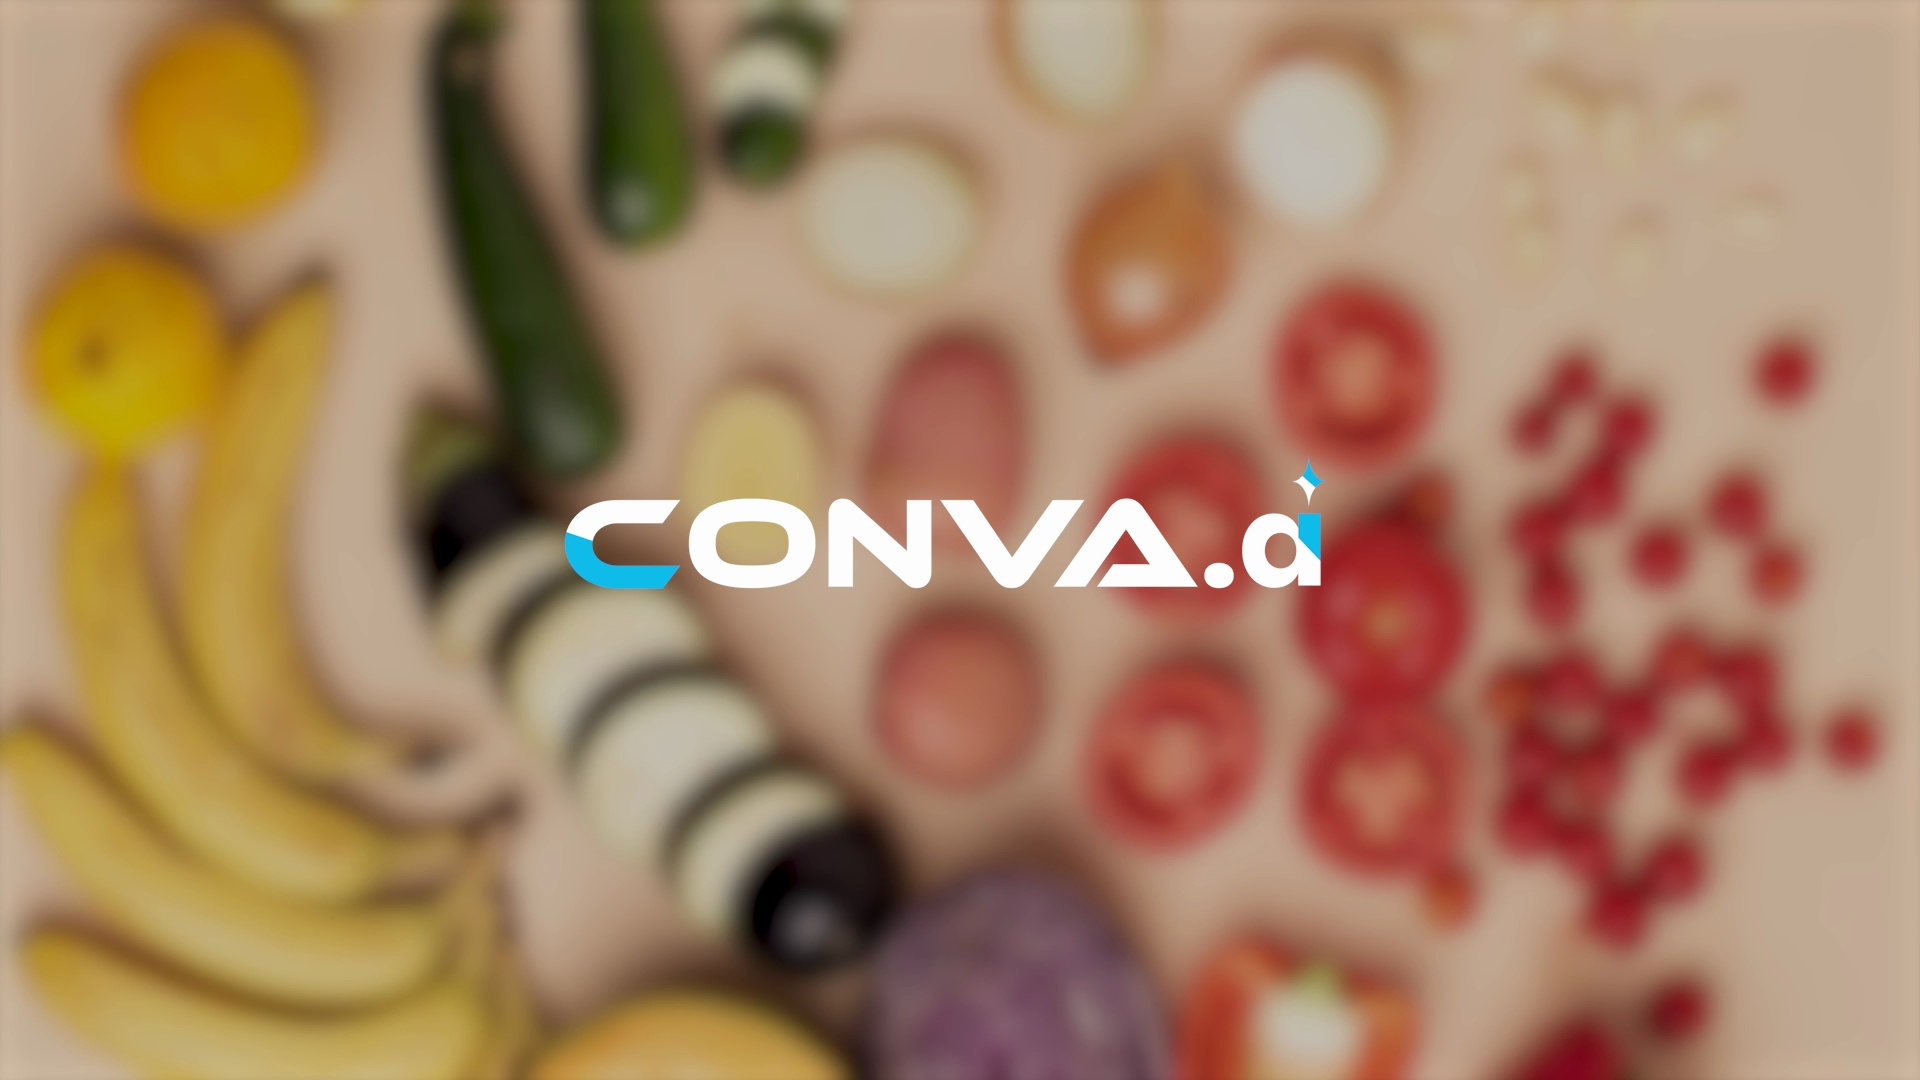

In [3]:
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)

## 3. Generating the Voiceover Script with GPT-4V
Here I create a message prompt that describes the task for the model. The message includes instructions for the `llm` on the style and content of the voiceover script. We then send this prompt, along with selected frames from the video, to `OpenAI's GPT-4V model`. The model generates a script based on our prompt and the context provided by the video frames.

> You can play around and adjust the prompt to see how it affects the generated script. 

> You can also adjust the frames that are sent to the model and find your own combination of frames that work best for your video.

In [ ]:
load_dotenv()
API_KEY = os.getenv('API_KEY')

PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These frames showcase a video of an AI assistant excelling in list processing tasks. The assistant is activated by an overlay and efficiently handles input from users for various products. Craft a dynamic voiceover script resembling that of a tech product narrator, brimming with enthusiasm and charisma. Highlight the assistant's remarkable list processing abilities with vigor and zest, captivating the audience with its capabilities. Use no more than 500 words."
            for x in map(lambda x: {"image": x, "resize": 768}, base64Frames[0::45]) # every 45th frame
        ],
    },
]
params = {
    "model": "gpt-4o-2024-05-13",
    "messages": PROMPT_MESSAGES,
    "api_key": API_KEY,
    #"headers": {"Openai-Version": "2020-11-07"},
    "max_tokens": 1000,
}

result = openai.ChatCompletion.create(**params)
print(result.choices[0].message.content)


In [ ]:
from openai import OpenAI
import os
from dotenv import load_dotenv
import base64
import cv2
import time
from IPython.display import display, Image

# Load environment variables
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

# Function to encode the image
def encode_image(frame):
    _, buffer = cv2.imencode(".jpg", frame)
    return base64.b64encode(buffer).decode("utf-8")

# Load video and encode frames
video = cv2.VideoCapture("list_2.5X.mp4")
base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    base64Frames.append(encode_image(frame))
video.release()

print(len(base64Frames), "frames read.")


# Initialize OpenAI client with API key
client = OpenAI(api_key=OPENAI_API_KEY)

# Constructing the prompt message
prompt_messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "These frames showcase a video of an AI assistant excelling in list processing tasks. The assistant is activated by an overlay and efficiently handles input from users for various products. Craft a dynamic voiceover script resembling that of a tech product narrator, brimming with enthusiasm and charisma. Highlight the assistant's remarkable list processing abilities with vigor and zest, captivating the audience with its capabilities. Use no more than 500 words."}
        ]
    }
]
# Add image frames to the prompt message
for img in base64Frames:
    image_message = {
        "type": "image_url",
        "image_url": {
            "url": f"data:image/jpeg;base64,{img}",
        }
    }
    prompt_messages[0]["content"].append(image_message)

# Send prompt message to OpenAI API for completion
client = OpenAI(api_key=OPENAI_API_KEY)

response = client.chat.completions.create(
    model="gpt-4o-2024-05-13",
    messages=prompt_messages,
    max_tokens=150
)

print(response.choices[0].message.content)


In [47]:
response = requests.post(
    "https://api.openai.com/v1/audio/speech",
    headers={
        "Authorization": f"Bearer {API_KEY}",
    },
    json={
        "model": "tts-1-hd-1106",
        "input": result.choices[0].message.content,
        "voice": "fable",
    },
)

audio = b""
for chunk in response.iter_content(chunk_size=1024 * 1024):
    audio += chunk
Audio(audio)

## 5. Saving and Playing the Audio
The MP3 audio stream is written to a local path file on the disk in `/data`.

In [55]:
with open('data/output.mp3', 'wb') as file:
    file.write(audio)

print("The MP3 file has been saved locally as 'data/output.mp3'.")

The MP3 file has been saved locally as 'data/output.mp3'.


In [28]:
import pandas as pd
import os
# Read the CSV files into pandas DataFrames
x1 = pd.read_csv('/Users/l/Github/polyglot/omni/G-Eval/d48b919c483b470e907530137a6adfb2_2024-05-09_2024-05-18.csv')
x2 = pd.read_csv('/Users/l/Github/polyglot/omni/G-Eval/final_table2024-05-19.csv')

# Find the Request_ID values in x1 that are not present in x2
unique_request_ids = set(x1['Request_ID']) - set(x2['Request_ID'])

# Filter rows in x1 based on unique_request_ids
x3 = x1[x1['Request_ID'].isin(unique_request_ids)]

# Write the result to a new CSV file
x3.to_csv('x8_yet_toGeval.csv', index=False)


In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Read the master file
master_df = pd.read_csv('/Users/l/Github/polyglot/omni/G-Eval/d48b919c483b470e907530137a6adfb2_2024-05-13_2024-05-20.csv')

# Convert the TimeGenerated column to datetime
master_df['TimeGenerated'] = pd.to_datetime(master_df['TimeGenerated'])

# Filter the rows based on the date range
start_date = datetime(2024, 5, 13)
end_date = datetime(2024, 5, 19)
filtered_df = master_df[(master_df['TimeGenerated'] >= start_date) & (master_df['TimeGenerated'] <= end_date)]

# Read the x1 file
x1_df = pd.read_csv('x1.csv')

# Find the matching request_id values
matching_ids = filtered_df['request_id'].isin(x1_df['request_id'])
matched_df = filtered_df[matching_ids]

# Write the matched rows to a new file
matched_df.to_csv('/Users/l/Downloads/output_13_19.csv', index=False)


In [14]:
import pandas as pd

# Define the date range with timezone
start_date = '2024-04-29'
end_date = '2024-05-05'

# Specify the file paths
master_file = '/Users/l/Github/polyglot/omni/G-Eval/d48b919c483b470e907530137a6adfb2_2024-04-29_2024-05-06.csv'
secondary_file = '/Users/l/Downloads/final_table2024-05-19.csv'

# Read the master file
master_df = pd.read_csv(master_file)

# Convert the TimeGenerated column to datetime with timezone awareness
master_df['TimeGenerated'] = pd.to_datetime(master_df['TimeGenerated'])

# Convert the start and end dates to datetime with UTC timezone
start_date_dt = pd.to_datetime(start_date).tz_localize('UTC')
end_date_dt = pd.to_datetime(end_date).tz_localize('UTC')

# Filter the master dataframe for the given date range
filtered_master_df = master_df[(master_df['TimeGenerated'] >= start_date_dt) & (master_df['TimeGenerated'] <= end_date_dt)]

# Debug: Print the number of rows after filtering by date range
print(f"Number of rows in filtered master dataframe: {len(filtered_master_df)}")
print(filtered_master_df.head())

# Read the secondary file
secondary_df = pd.read_csv(secondary_file)

# Debug: Print the number of rows in the secondary dataframe
print(f"Number of rows in secondary dataframe: {len(secondary_df)}")
print(secondary_df.head())

# Find matching request IDs in the secondary file
matching_request_ids_df = secondary_df[secondary_df['request_id'].isin(filtered_master_df['request_id'])]

# Debug: Print the number of matching request IDs
print(f"Number of matching request IDs: {len(matching_request_ids_df)}")
print(matching_request_ids_df.head())

# Output file name
output_file = f'filtered_requests_{start_date}_to_{end_date}.csv'

# Write the result to the output file
matching_request_ids_df.to_csv(output_file, index=False)

print(f"Filtered data has been written to {output_file}")


Number of rows in filtered master dataframe: 246
                app_context                      assistant_id assistant_name  \
0  {"domain_name":"retail"}  d48b919c483b470e907530137a6adfb2       Tata Neu   
1  {"domain_name":"retail"}  d48b919c483b470e907530137a6adfb2       Tata Neu   
2  {"domain_name":"retail"}  d48b919c483b470e907530137a6adfb2       Tata Neu   
3  {"domain_name":"retail"}  d48b919c483b470e907530137a6adfb2       Tata Neu   
4  {"domain_name":"retail"}  d48b919c483b470e907530137a6adfb2       Tata Neu   

  assistant_version        device_id domain_name  \
0             4.0.4  200650635661664      retail   
1             5.0.0  196511129213791      retail   
2             5.0.0  196511129213791      retail   
3             4.0.4  196511129213791      retail   
4             4.0.5  196511129213791      retail   

                                             history  \
0                                                NaN   
1  User: how many neu coins do I have?\nAssis

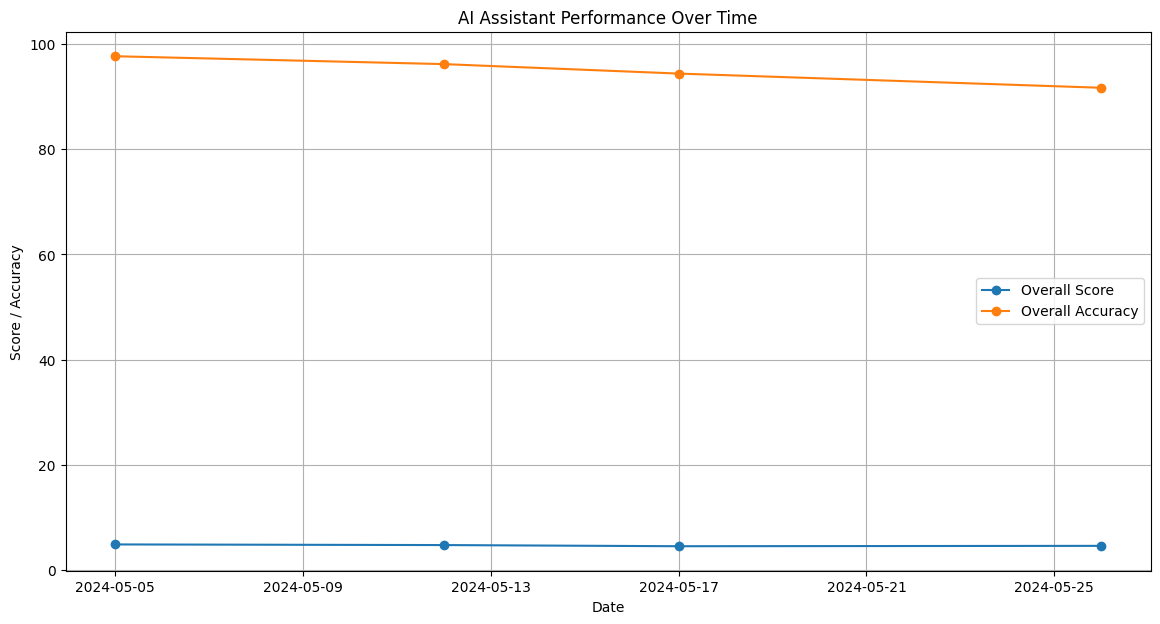

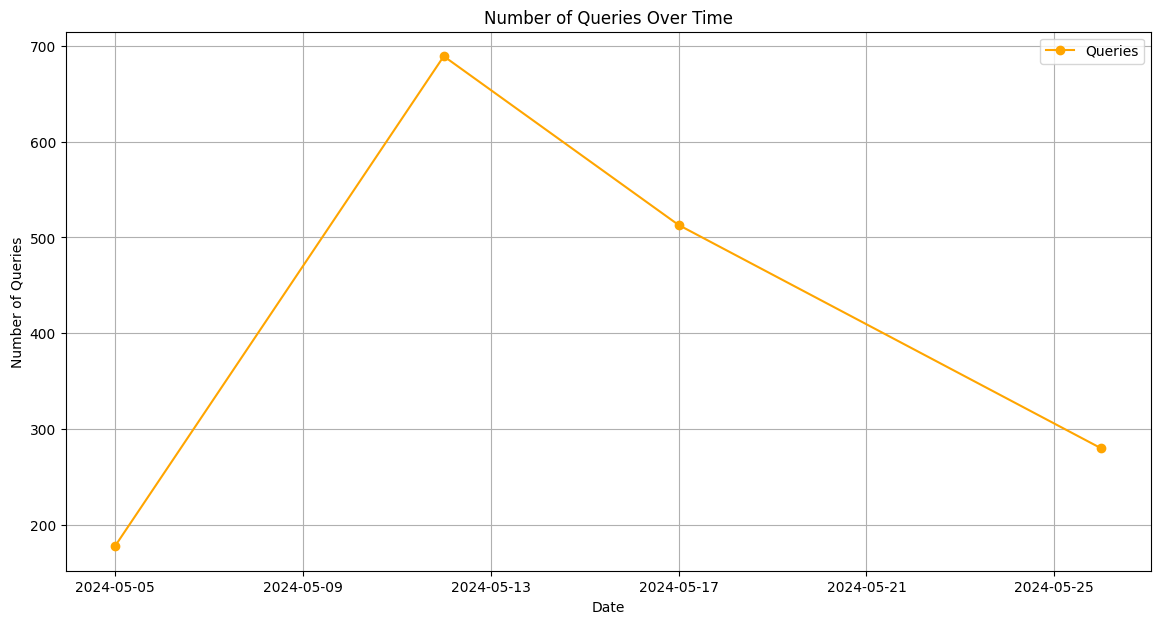

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data directly in the code
data = {
    'Date': ['2024-05-05', '2024-05-12', '2024-05-17', '2024-05-26'],
    'Intent_Score': [4.90, 4.71, 4.71, 4.66],
    'Intent_Accuracy': [97.2, 91.6, 91.4, 93.2],
    'Category_Score': [4.91, 4.67, 4.86, 4.81],
    'Category_Accuracy': [97.2, 91.7, 98.3, 96.2],
    'Search_Term_Score': [4.73, 4.65, 4.37, 4.63],
    'Search_Term_Accuracy': [93.1, 89.7, 85.0, 92.7],
    'Suggestions_Score': [4.84, 4.78, 4.22, 4.53],
    'Suggestions_Accuracy': [97.6, 91.9, 88.9, 90.5],
    'Message_Score': [4.90, 4.86, 4.45, 4.66],
    'Message_Accuracy': [97.7, 96.2, 94.4, 93.2],
    'Overall_Score': [4.85, 4.73, 4.51, 4.58],
    'Overall_Accuracy': [97.7, 96.2, 94.4, 91.7],
    'Queries': [178, 689, 513, 280]
}

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date column as the index
df.set_index('Date', inplace=True)

# Plot the Overall Score over time
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Overall_Score'], marker='o', label='Overall Score')
plt.plot(df.index, df['Overall_Accuracy'], marker='o', label='Overall Accuracy')
plt.title('AI Assistant Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Score / Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot the number of Queries over time
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Queries'], marker='o', label='Queries', color='orange')
plt.title('Number of Queries Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Queries')
plt.legend()
plt.grid(True)
plt.show()


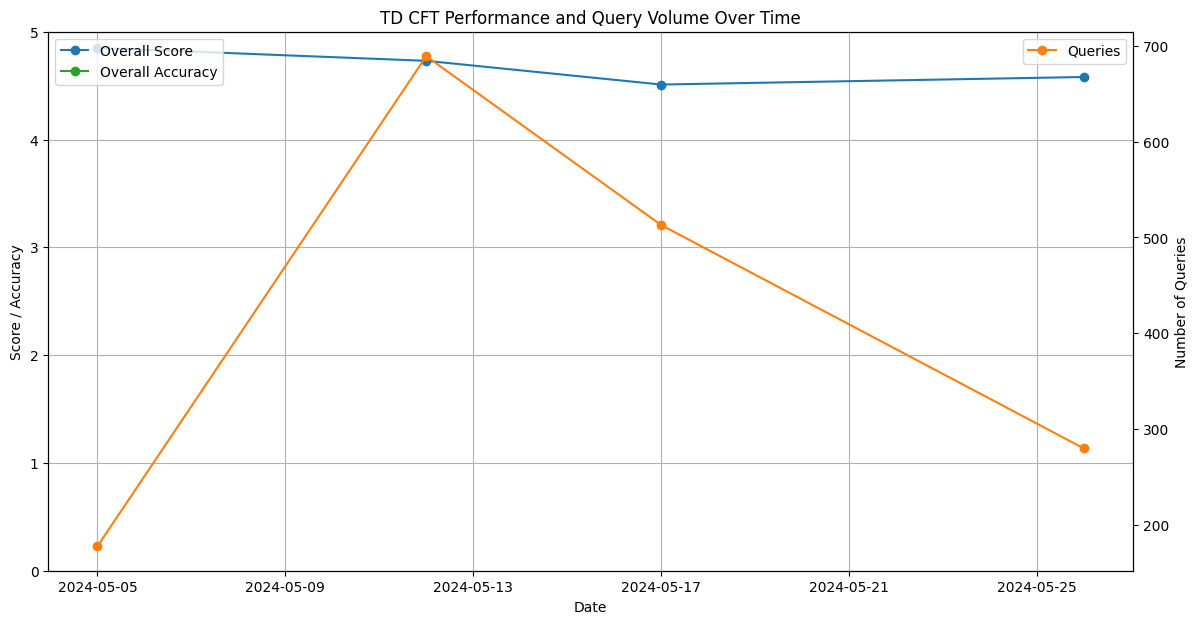

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data directly in the code
data = {
    'Date': ['2024-05-05', '2024-05-12', '2024-05-17', '2024-05-26'],
    'Intent_Score': [4.90, 4.71, 4.71, 4.66],
    'Intent_Accuracy': [97.2, 91.6, 91.4, 93.2],
    'Category_Score': [4.91, 4.67, 4.86, 4.81],
    'Category_Accuracy': [97.2, 91.7, 98.3, 96.2],
    'Search_Term_Score': [4.73, 4.65, 4.37, 4.63],
    'Search_Term_Accuracy': [93.1, 89.7, 85.0, 92.7],
    'Suggestions_Score': [4.84, 4.78, 4.22, 4.53],
    'Suggestions_Accuracy': [97.6, 91.9, 88.9, 90.5],
    'Message_Score': [4.90, 4.86, 4.45, 4.66],
    'Message_Accuracy': [97.7, 96.2, 94.4, 93.2],
    'Overall_Score': [4.85, 4.73, 4.51, 4.58],
    'Overall_Accuracy': [97.7, 96.2, 94.4, 91.7],
    'Queries': [178, 689, 513, 280]
}

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date column as the index
df.set_index('Date', inplace=True)

# Create the plot with secondary y-axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Overall Score and Overall Accuracy on the primary y-axis
ax1.plot(df.index, df['Overall_Score'], marker='o', label='Overall Score', color='tab:blue')
ax1.plot(df.index, df['Overall_Accuracy'], marker='o', label='Overall Accuracy', color='tab:green')
ax1.set_xlabel('Date')
ax1.set_ylabel('Score / Accuracy')
ax1.set_title('TD CFT Performance and Query Volume Over Time')
ax1.legend(loc='upper left')
ax1.grid(True)

# Ensure the primary y-axis is set from 0 to 5 for Overall Score
ax1.set_ylim(0, 5)

# Create a secondary y-axis to plot Queries
ax2 = ax1.twinx()
ax2.plot(df.index, df['Queries'], marker='o', label='Queries', color='tab:orange')
ax2.set_ylabel('Number of Queries')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


In [5]:
import csv
import json
import pandas as pd

# Read the input CSV file
input_file = 'message_analysis_done.csv'
df = pd.read_csv(input_file)

# Extract the "Message_analysis" column and split the JSON objects
json_data = []
for i, row in df['Message_analysis'].items():
    try:
        json_obj = json.loads(row.strip('"'))
        json_data.append(json_obj)
    except json.JSONDecodeError:
        print(f"Error parsing JSON in row {i}: {row}")
        json_data.append({})

# Check if the json_data list is not empty
if json_data:
    # Create a new DataFrame with the JSON data
    new_df = pd.DataFrame(json_data)

    # Write the new DataFrame to a new CSV file
    output_file = 'message_analysis_split.csv'
    new_df.to_csv(output_file, index=False)
else:
    print("The 'Message_analysis' column is empty or contains invalid JSON data.")


Error parsing JSON in row 0: json
{
  "request_id": "023d3426-5002-4325-b259-deeafe532f52",
  "query": "how fast can i get a melon",
  "original_message": "Showing you melon",
  "message_type": "Informational",
  "relevance": "On-topic",
  "completeness": "Incomplete",
  "clarity": "Clear",
  "engagement": "Bland",
  "actionability": "Non-actionable",
  "politeness": "Polite",
  "tone": "Appropriate",
  "personalization": "Generic",
  "accuracy": "Accurate",
  "efficiency": "Efficient",
  "supportive": "Supportive",
  "improvement_suggestion": "Showing you melons. To check delivery speed, please add items to your cart.",
  "notes": "The message is satisfactory, but it doesn't address the user's question about delivery speed. It could be improved by providing a call to action to check delivery speed."
}

Error parsing JSON in row 1: json
{
  "request_id": "03324586-1dcf-4cf7-b9bb-6c869a74c877",
  "query": "want to do test for my stomach pain",
  "original_message": "Here are some diagno